In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap, ListedColormap

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('fotocasa_231009_ref.csv')

In [3]:
data.head()

,item_id,postal_code,neighborhood,price,surface,description
0,178308671,48010,Sabino Arana - Jesuitas,850000.0,182.0,INMOBILIARIA SALAZAR VENDE en EXCLUSIVA una ma...
1,179165549,48009,Campuzano,580000.0,125.0,Atehome vende este bonito u00E1tico muy lumino...
2,179047088,48004,Santutxu - Basarrate,157000.0,65.0,""" EXCLUSIVA "" Piso totalmente exterior en Plaz..."
3,179065404,48006,Santutxu - Basarrate,157000.0,68.0,EXCLUSIVA !!! .Vivienda con encanto y personal...
4,178577109,48012,Iralabarri,148000.0,67.0,Interesante piso en Torre Urizar con un proyec...


In [4]:
data.shape

(225, 6)

# 1. Data cleaning

In [5]:
data.isna().sum()

item_id         0
postal_code     0
neighborhood    0
price           3
surface         1
description     0
dtype: int64

In [6]:
data.dtypes

item_id           int64
postal_code       int64
neighborhood     object
price           float64
surface         float64
description      object
dtype: object

In [7]:
data = data[data['surface'].isna()==False]
data = data[data['price'].isna()==False]

In [8]:
data['postal_code'] = data['postal_code'].astype('object')

# 2. Data wrangling

In [9]:
# for i in data.columns:
#     display(data[i].value_counts())

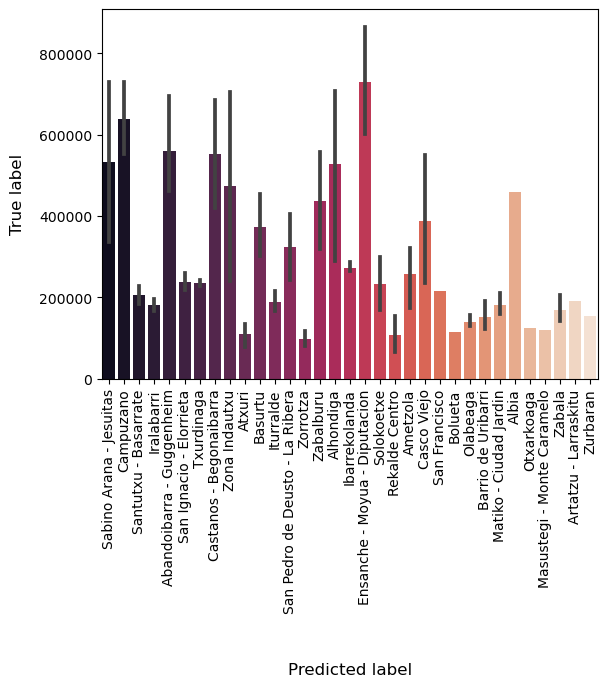

In [10]:
ax = sns.barplot(x="neighborhood", y="price", data=data, palette = 'rocket')

plt.rcParams.update({'font.size': 12})
plt.xlabel('\n\nPredicted label', fontsize=12, labelpad=10)
plt.ylabel('True label', fontsize=12, labelpad=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [12]:
data_model = data.copy()

In [15]:
data_model['neighborhood'].value_counts()

Santutxu - Basarrate               19
Abandoibarra - Guggenheim          19
Campuzano                          18
Basurtu                            14
Ensanche - Moyua - Diputacion      11
San Ignacio - Elorrieta            11
Castanos - Begonaibarra            10
Barrio de Uribarri                 10
Txurdinaga                         10
Iralabarri                          9
Zabala                              8
Casco Viejo                         8
San Francisco                       7
Iturralde                           6
Olabeaga                            6
Ibarrekolanda                       6
Solokoetxe                          5
Ametzola                            5
Sabino Arana - Jesuitas             5
Alhondiga                           4
Zorrotza                            4
San Pedro de Deusto - La Ribera     4
Rekalde Centro                      3
Bolueta                             3
Atxuri                              3
Matiko - Ciudad Jardin              3
Zona Indautx

In [21]:
list_drop = ['Zabalburu', 'Albia', 'Otxarkoaga', 'Masustegi - Monte Caramelo', 'Artatzu - Larraskitu', 'Zurbaran']

for i in data_model['neighborhood']:
    if i in list_drop:
        data_model = data_model.drop(data_model[data_model['neighborhood'] == i].index, axis=0)
    

In [22]:
data_model.isna().sum()

item_id         0
postal_code     0
neighborhood    0
price           0
surface         0
description     0
dtype: int64

In [29]:
data_model = data_model.drop(['item_id', 'postal_code', 'description'], axis=1)

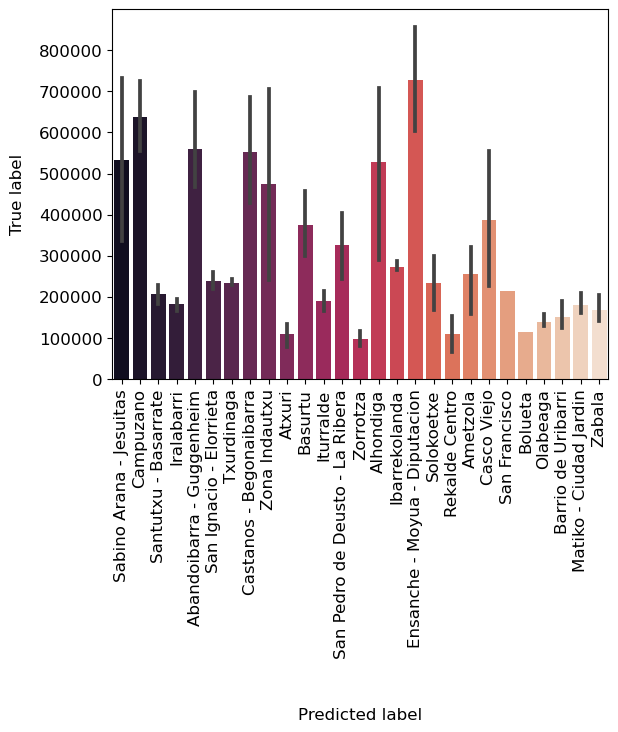

In [23]:
ax = sns.barplot(x="neighborhood", y="price", data=data_model, palette = 'rocket')

plt.rcParams.update({'font.size': 12})
plt.xlabel('\n\nPredicted label', fontsize=12, labelpad=10)
plt.ylabel('True label', fontsize=12, labelpad=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

# 3. Modelling

In [30]:
y = data_model['price']
X = data_model.drop(['price'], axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [32]:
X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)

In [33]:
X_trans = MinMaxScaler().fit(X_train_num)
X_train_nor = X_trans.transform(X_train_num)

X_train_num = pd.DataFrame(X_train_nor, columns=X_train_num.columns)

X_test_nor = X_trans.transform(X_test_num)
X_test_num = pd.DataFrame(X_test_nor, columns = X_train_num.columns)

In [34]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded = encoder.transform(X_train_cat).toarray()
X_train_cat = pd.DataFrame(encoded)
encoded = encoder.transform(X_test_cat).toarray()
X_test_cat = pd.DataFrame(encoded)

In [35]:
X_train = pd.concat([X_train_num, X_train_cat],axis=1)
X_test = pd.concat([X_test_num, X_test_cat],axis=1)

In [36]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [37]:
model = linear_model.LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
predictions = model.predict(X_test)

In [40]:
predictions

array([139850.31855528, 761338.5298132 , 235971.01915725, 476558.68172977,
       114900.        , 333176.55784567, 251136.62397297, 119301.71333294,
       171784.18281409, 201786.30651598, 182314.0120393 , 170864.7697064 ,
       253759.8730172 , 619115.36699755, 180883.54570352, 215000.        ,
       180883.54570352, 188380.50340129, 253759.8730172 , 345659.23371005,
       808394.26600489, 219394.7051167 ])

In [41]:
y_test

116    199000.0
217    750000.0
114    219000.0
115    390000.0
55     114900.0
36     195000.0
63     219000.0
160    139000.0
4      148000.0
34     189000.0
126    280000.0
43     198000.0
101    265000.0
73     530000.0
169    194900.0
120    215000.0
102    194900.0
105    218000.0
159    265000.0
42     325000.0
48     750000.0
211    320000.0
Name: price, dtype: float64

In [42]:
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model.score(X_test, y_test)

r2 = r2_score(y_test, predictions)

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mean_squared_error(y_test, predictions))

mae = mean_absolute_error(y_test, predictions)


In [43]:
r2

0.8967574379793979

In [46]:
mse

3015993174.5578103

In [47]:
rmse

54918.05872896283